In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math as ma
import seaborn as sns

In [15]:
n = 200
M = 1000

In [16]:
def g(x):
    return np.cos(ma.pi*x/2)

# PLEASE ADAPT THE CODE MANUALLY WHEN CHANGING IMPORTANCE FUNCTION 
#def q_tilde(x):
    #return 1.5*(1-x**2)

def q_1(x):
    return 1.5*(1-x**2)

def q_2(x):
    return 2*(1-x)

#def q_tilde(x):
    #return 2*(1-x)

def q_tilde(x):
    return np.pi*np.cos(ma.pi*x/2)*0.5

def approxEsperance_w(fonction, N):
    samples = [g(np.random.uniform()) for x in range(N)]
    mu_n = sum(samples)/N
    return mu_n

def approxEsperance_redVar(fonction, N):
    samples_1,samples_2 = [],[]
    for _ in range(N):
        u=np.random.uniform()
        samples_1.append(g(u))
        samples_2.append(g(1-u))

    mu_n = (sum(samples_1)+sum(samples_2))/(len(samples_1)+len(samples_2))
    return mu_n


# PLEASE ADAPT THE CODE MANUALLY WHEN CHANGING IMPORTANCE FUNCTION 
def approxEsperance(fonction, N,q):
    sum = 0
    iteration = 0
    #Methode de Rejet
    while iteration<N:
        x = (np.random.uniform())
        u = (np.random.uniform())
        if (g(x) > 1.5*u): #condition pour la fonction np.pi*np.cos(ma.pi*x/2)*0.5
                                 #pour 1.5*(1-x**2) mettre comme condition g(x) > 1.5*u
                                 #pour 2*(1-x) mettre comme condition g(x) > 2*u
            sum += fonction(x)/q(x)
            iteration += 1

    return sum/N
# PLEASE ADAPT THE CODE MANUALLY WHEN CHANGING IMPORTANCE FUNCTION 

def histogramme(N):
    histo = sample_mu_N
    for i in range(len(sample_mu_N)):
        histo[i] = np.sqrt(N)*(histo[i] - mean_sample_mu_N)
    return histo


def var_empi(M):
    sum = 0
    for i in range(M):
        sum += (sample_mu_N[i] - mean_sample_mu_N)**2
    return sum/M

In [17]:
print(approxEsperance(g,n,q_tilde))

sample_mu_N = [approxEsperance(g, n,q_tilde) for i in range(M)]
sample_mu_N_q1 = [approxEsperance(g, n,q_1) for i in range(M)]
sample_mu_N_q2 = [approxEsperance(g, n,q_2) for i in range(M)]
sample_mu_N_q_tilde = [approxEsperance(g, n,q_tilde) for i in range(M)]

sample_mu_N_w = [approxEsperance_w(g, n) for i in range(M)]
sample_mu_N_redvar = [approxEsperance_redVar(g, n) for i in range(M)]
mean_sample_mu_N = np.mean(sample_mu_N)


var_empirique = np.var(sample_mu_N_w)

0.6366197723675812


In [18]:
var_theo = 0.5 - 4/(ma.pi**2)
std_theo = np.sqrt(var_theo)
std_empirique = np.sqrt(var_empirique)

/home/eric/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/eric/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eric/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/eric/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

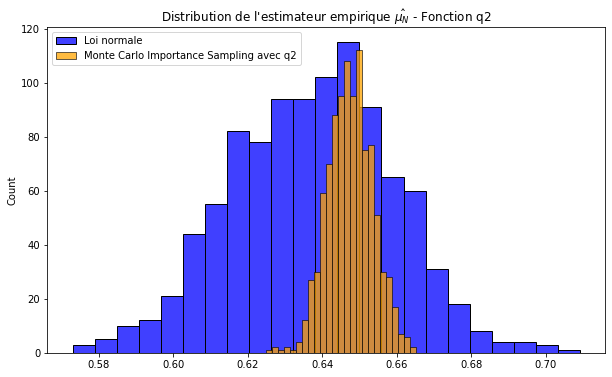

In [20]:
plt.figure(figsize=(10,6))
sns.histplot([np.random.normal(loc=2/ma.pi,scale=np.sqrt(var_empirique)) for _ in range(M)],label='Loi normale',color='blue')
sns.histplot(sample_mu_N_q2,label='Monte Carlo Importance Sampling avec q2',color='orange')

plt.legend()
plt.title("Distribution de l'estimateur empirique $\hat{\mu_{N}}$ - Fonction q2")
plt.show()

/home/eric/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/eric/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eric/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/eric/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

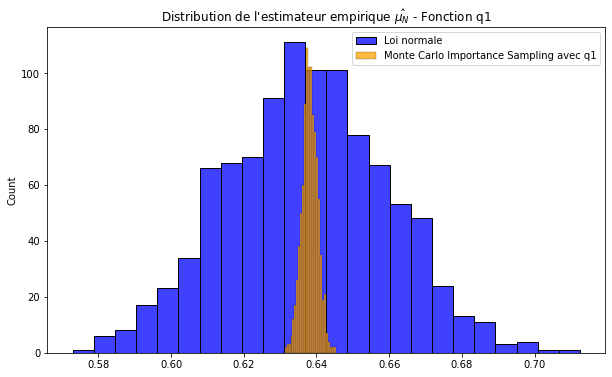

In [21]:
plt.figure(figsize=(10,6))
sns.histplot([np.random.normal(loc=2/ma.pi,scale=np.sqrt(var_empirique)) for _ in range(M)],label='Loi normale',color='blue')
sns.histplot(sample_mu_N_q1,label='Monte Carlo Importance Sampling avec q1',color='orange')

plt.legend()
plt.title("Distribution de l'estimateur empirique $\hat{\mu_{N}}$ - Fonction q1")
plt.show()

/home/eric/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/eric/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eric/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/eric/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

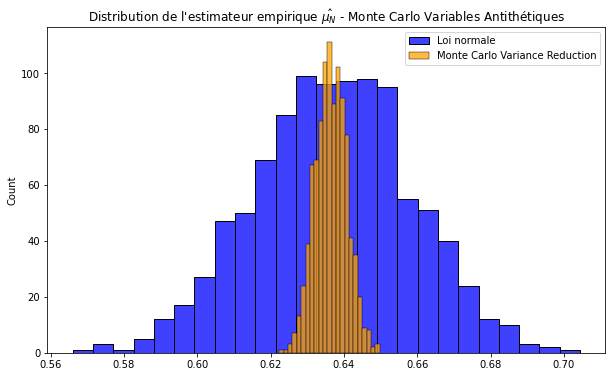

In [22]:
plt.figure(figsize=(10,6))
sns.histplot([np.random.normal(loc=2/ma.pi,scale=np.sqrt(var_empirique)) for _ in range(M)],label='Loi normale',color='blue')
sns.histplot(sample_mu_N_redvar,label='Monte Carlo Variance Reduction',color='orange')

plt.legend()
plt.title("Distribution de l'estimateur empirique $\hat{\mu_{N}}$ - Monte Carlo Variables Antithétiques")
plt.show()

/home/eric/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/eric/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/eric/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/eric/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

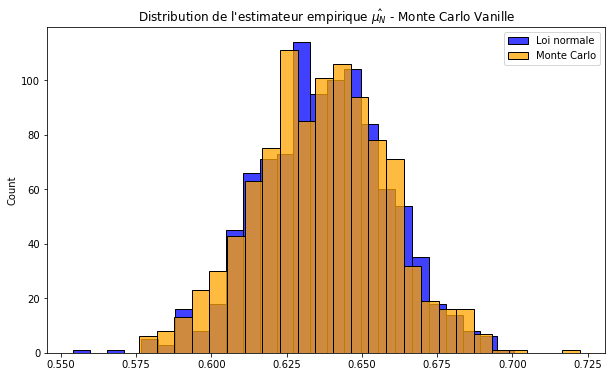

In [23]:
plt.figure(figsize=(10,6))
sns.histplot([np.random.normal(loc=2/ma.pi,scale=np.sqrt(var_empirique)) for _ in range(M)],label='Loi normale',color='blue')
sns.histplot(sample_mu_N_w,label='Monte Carlo',color='orange')

plt.legend()
plt.title("Distribution de l'estimateur empirique $\hat{\mu_{N}}$ - Monte Carlo Vanille")
plt.show()